In [1]:
import numpy as np
from sklearn import metrics
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv("dataset/book_data.csv")
df.fillna(value="", inplace=True)


df.drop_duplicates(subset=["book_title"], inplace=True)


df["genres"] = df["genres"].apply(lambda x: x.split("|"))

df["book_authors"] = df["book_authors"].apply(lambda x: x.split("|"))

df["book_pages"] = pd.to_numeric(
    df["book_pages"].str.replace(" pages", ""), errors="coerce"
)

df["book_pages"] = (
    df["book_pages"]
    .astype(str)
    .str.replace(" pages", "")
    .replace("", np.nan)
    .astype(float)
)

In [2]:
df.describe()

,book_pages,book_rating,book_rating_count,book_review_count
count,46148.000000,48483.000000,4.848300e+04,48483.000000
mean,333.913192,4.017706,2.802133e+04,1341.867273
std,263.550335,0.370071,1.586540e+05,5686.872772
min,0.000000,0.000000,0.000000e+00,0.000000
25%,211.000000,3.820000,3.310000e+02,30.000000
50%,304.000000,4.020000,2.348000e+03,159.000000
75%,400.000000,4.220000,1.016800e+04,650.000000
max,14777.000000,5.000000,5.588580e+06,160776.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48483 entries, 0 to 54300
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   book_authors       48483 non-null  object 
 1   book_desc          48483 non-null  object 
 2   book_edition       48483 non-null  object 
 3   book_format        48483 non-null  object 
 4   book_isbn          48483 non-null  object 
 5   book_pages         46148 non-null  float64
 6   book_rating        48483 non-null  float64
 7   book_rating_count  48483 non-null  int64  
 8   book_review_count  48483 non-null  int64  
 9   book_title         48483 non-null  object 
 10  genres             48483 non-null  object 
 11  image_url          48483 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 4.8+ MB


In [4]:
X = df[['book_pages', 'book_rating', 'book_rating_count']].values
X

array([[3.740000e+02, 4.330000e+00, 5.519135e+06],
       [8.700000e+02, 4.480000e+00, 2.041594e+06],
       [3.240000e+02, 4.270000e+00, 3.745197e+06],
       ...,
       [         nan, 3.660000e+00, 3.200000e+01],
       [2.720000e+02, 3.820000e+00, 8.670000e+02],
       [2.360000e+02, 3.580000e+00, 1.200000e+01]])

In [5]:
X = np.nan_to_num(X)

In [6]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [7]:
wcss = []
for i in range(40, 65):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


In [ ]:
plt.plot(range(1, 26), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
df.info

<bound method DataFrame.info of                                             book_authors  \
0                                      [Suzanne Collins]   
1                          [J.K. Rowling, Mary GrandPré]   
2                                           [Harper Lee]   
3      [Jane Austen, Anna Quindlen, Mrs. Oliphant, Ge...   
4                                      [Stephenie Meyer]   
...                                                  ...   
54296                                    [Howard Megdal]   
54297                                    [Howard Megdal]   
54298                                    [Howard Megdal]   
54299                          [Mimi Baird, Eve Claxton]   
54300                                       [Leah Price]   

                                               book_desc  \
0      Winning will make you famous. Losing means cer...   
1      There is a door at the end of a silent corrido...   
2      The unforgettable novel of a childhood in a sl...   
3      

In [9]:
df['genres']

0        [Young Adult, Fiction, Science Fiction, Dystop...
1                          [Fantasy, Young Adult, Fiction]
2        [Classics, Fiction, Historical, Historical Fic...
3                             [Classics, Fiction, Romance]
4        [Young Adult, Fantasy, Romance, Paranormal, Va...
                               ...                        
54296    [Sports, Baseball, Sports and Games, Sports, N...
54297               [Nonfiction, Sports and Games, Sports]
54298                        [Sports, Baseball, Abandoned]
54299    [Nonfiction, Autobiography, Memoir, Biography,...
54300    [Criticism, Literary Criticism, Philosophy, Th...
Name: genres, Length: 48483, dtype: object

In [10]:
genres_list = [genre for genres in df['genres'] for genre in genres]
unique_genres = pd.unique(genres_list)
unique_genres.shape

(863,)

In [11]:
print(unique_genres)

['Young Adult' 'Fiction' 'Science Fiction' 'Dystopia' 'Fantasy' 'Classics'
 'Historical' 'Historical Fiction' 'Academic' 'School' 'Romance'
 'Paranormal' 'Vampires' 'Childrens' 'Literature' 'Politics' 'Novels'
 'Read For School' 'Contemporary' 'Humor' 'Picture Books' 'Mystery'
 'Thriller' 'Horror' 'Gothic' '19th Century' 'Classic Literature'
 'European Literature' 'British Literature' 'Plays' 'Drama' 'High School'
 'Poetry' 'Philosophy' 'Spirituality' 'Inspirational' 'Adventure'
 'Self Help' 'Cultural' 'Russia' 'Russian Literature' 'Adult' 'American'
 'Time Travel' 'Canada' 'Middle Grade' 'Audiobook' 'Coming Of Age'
 'Science Fiction Fantasy' 'Magical Realism' 'Epic Fantasy' 'Mythology'
 'War' 'Apocalyptic' 'Post Apocalyptic' 'Animals' 'Feminism'
 'Short Stories' 'Crime' 'Detective' 'Womens Fiction' 'Chick Lit'
 'Psychology' 'Mental Health' 'Mental Illness' 'Health'
 'Historical Romance' 'Nonfiction' 'Autobiography' 'Memoir' 'Biography'
 'Africa' 'Religion' 'Spanish Literature' '20th C

In [12]:
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np

mlb = MultiLabelBinarizer()

genres_matrix =  mlb.fit_transform(df['genres'])
print(genres_matrix.shape)


(48483, 863)


In [13]:
genres_matrix[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
'''


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
clusters_range = range(50, 100)
inertias = []
silhouette_scores = []
for k in clusters_range:
    #kmeans = KMeans(n_clusters = k, random_state=12)
    #kmeans.fit(genres_matrix)
    #inertias.append(kmeans.inertia_)
    
'''
    #Create SilhouetteVisualizer instance with KMeans instance
    #Fit the visualizer
'''
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

### END SOLUTION
plt.plot(clusters_range, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score for each number of clusters')
plt.show()

'''

"\n    kmeans = KMeans(n_clusters=k, random_state=42)\n    cluster_labels = kmeans.fit_predict(X)\n    silhouette_avg = silhouette_score(X, cluster_labels)\n    silhouette_scores.append(silhouette_avg)\n\n### END SOLUTION\nplt.plot(clusters_range, silhouette_scores, 'bx-')\nplt.xlabel('Number of clusters')\nplt.ylabel('Silhouette score')\nplt.title('Silhouette score for each number of clusters')\nplt.show()\n\n"

In [15]:
#print(silhouette_scores)

In [16]:
from sklearn.cluster import KMeans 
kmeans_temp = KMeans(n_clusters = 57, random_state=35).fit(genres_matrix)

print(kmeans_temp.labels_)

[ 1 39 48 ...  8 37 31]


In [17]:
cluster_centers = kmeans_temp.cluster_centers_

# Calculate the total intra-cluster distance (sum of squared distances of each point to its closest cluster center)
intra_cluster_distance = kmeans_temp.inertia_

# Calculate the inter-cluster distance (sum of squared distances between each pair of cluster centers)
inter_cluster_distance = 0
for i in range(len(cluster_centers)):
    for j in range(i+1, len(cluster_centers)):
        distance = np.sum(np.square(cluster_centers[i] - cluster_centers[j]))
        inter_cluster_distance += distance

print("Intra-cluster distance:", intra_cluster_distance)
print("Inter-cluster distance:", inter_cluster_distance)

Intra-cluster distance: 105529.61430971505
Inter-cluster distance: 7935.000366019874


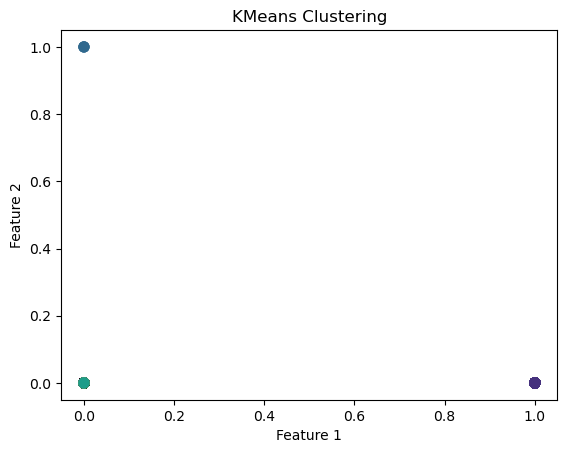

In [18]:
plt.scatter(genres_matrix[:, 0], genres_matrix[:, 1], c=kmeans_temp.labels_, s=50, cmap='viridis')

# Add labels and title to the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')

# Show the plot
plt.show()

In [161]:
cluster_counts = pd.Series(kmeans_temp.labels_).value_counts()
print(cluster_counts.iloc[52])

225


In [162]:
cluster_dict = {}
for i, label in enumerate(kmeans_temp.labels_):
    if label not in cluster_dict:
        cluster_dict[label] = []
    genre_indices = np.where(genres_matrix[i] == 1)[0]
    genres = mlb.classes_[genre_indices]
    cluster_dict[label].extend(genres)
    cluster_dict[label] = list(set(cluster_dict[label]))
    
print(cluster_dict[3])

['Coming Of Age', 'Abandoned', 'Mental Health', 'Survival', 'Christian', 'Crime', 'European Literature', 'Sports', 'Romantic', 'Sports and Games', 'Young Adult', 'Childrens', 'Travel', 'Did Not Finish', 'Amish', 'Plays', 'Young Adult Contemporary', 'Thriller', 'Middle Grade', 'Audiobook', 'Health', 'New Adult', 'Theatre', 'M M Romance', 'Drama', 'Adventure', 'Abuse', 'Boarding School', 'Romance', 'War', 'Mental Illness', 'Religion', 'Mystery', 'Disability', 'Sociology', 'Cultural', 'Military Fiction', 'Spanish Literature', 'Contemporary', 'School Stories', 'Teen', 'Humor', 'Poetry', 'Fantasy', 'Fairy Tales', 'Realistic Fiction', 'High School', 'Australia', 'Road Trip', 'Lgbt', 'Music', 'Christian Fiction']


In [23]:
cluster_books = df.iloc[np.where(kmeans_temp.labels_ == 3)[0]]['book_title'].tolist()
print(", \t".join(cluster_books))


Rules of Attraction, 	On the Jellicoe Road, 	Chain Reaction, 	Leaving Paradise, 	What Happened to Goodbye, 	Second Chance Summer, 	Return to Paradise, 	Temptation, 	Sing Me to Sleep, 	So Much Closer, 	This Is What Happy Looks Like, 	This Song Will Save Your Life, 	The Girl Who Fell, 	Take Me There, 	The Probability of Miracles, 	Playlist for the Dead, 	Keep Holding On, 	I'll Meet You There, 	Never Eighteen, 	The Secret Identity of Devon Delaney, 	The Good, The Bad, And The Bullied, 	The Moon and More, 	My Life with the Walter Boys, 	Jellicoe Road, 	Der Märchenerzähler, 	The Knife That Killed Me, 	Fixing Delilah, 	Guitar Notes, 	Far from You, 	What She Left Behind, 	Something Real, 	Snitch, 	Saving June, 	Faking Normal, 	The Wrong Side of Right, 	Something like Normal, 	Waves, 	Push Girl, 	Stay, 	What Happens Next, 	What They Always Tell Us, 	Pero a tu lado, 	Amazing Grace, 	I Know It's Over, 	The Off Season, 	Scars, 	What You Left Behind, 	Things We Know by Heart, 	The Pretty One, 	Los

In [19]:
for i in range(kmeans_temp.n_clusters):
    cluster_books = df.iloc[np.where(kmeans_temp.labels_ == i)[0]]['book_title'].tolist()
    num_books = len(cluster_books)
    print(f"Cluster {i}: {num_books} books")

Cluster 0: 350 books
Cluster 1: 675 books
Cluster 2: 690 books
Cluster 3: 130 books
Cluster 4: 1030 books
Cluster 5: 860 books
Cluster 6: 990 books
Cluster 7: 974 books
Cluster 8: 4233 books
Cluster 9: 609 books
Cluster 10: 2704 books
Cluster 11: 565 books
Cluster 12: 1321 books
Cluster 13: 176 books
Cluster 14: 1188 books
Cluster 15: 1811 books
Cluster 16: 781 books
Cluster 17: 1278 books
Cluster 18: 821 books
Cluster 19: 799 books
Cluster 20: 734 books
Cluster 21: 1009 books
Cluster 22: 2258 books
Cluster 23: 645 books
Cluster 24: 849 books
Cluster 25: 282 books
Cluster 26: 615 books
Cluster 27: 839 books
Cluster 28: 339 books
Cluster 29: 433 books
Cluster 30: 897 books
Cluster 31: 743 books
Cluster 32: 225 books
Cluster 33: 392 books
Cluster 34: 829 books
Cluster 35: 1241 books
Cluster 36: 329 books
Cluster 37: 1120 books
Cluster 38: 455 books
Cluster 39: 985 books
Cluster 40: 798 books
Cluster 41: 549 books
Cluster 42: 358 books
Cluster 43: 175 books
Cluster 44: 870 books
Cluster 4

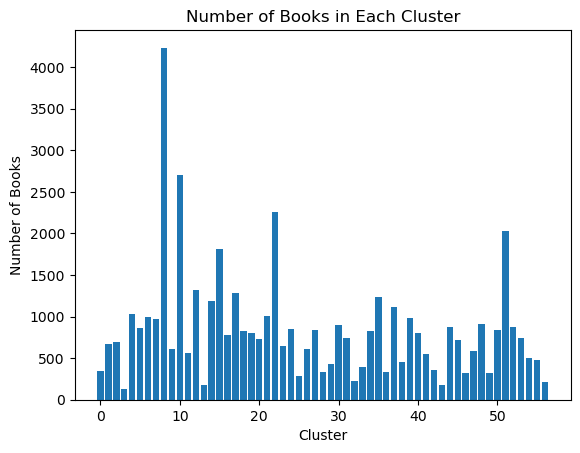

In [20]:
import matplotlib.pyplot as plt

# List of number of books in each cluster
num_books = [350, 675, 690, 130, 1030, 860, 990, 974, 4233, 609, 2704, 565, 1321, 176, 1188, 1811, 781, 1278, 821, 799, 734, 1009, 2258, 645, 849, 282, 615, 839, 339, 433, 897, 743, 225, 392, 829, 1241, 329, 1120, 455, 985, 798, 549, 358, 175, 870, 720, 322, 586, 905, 320, 839, 2030, 880, 741, 497, 475, 214]

# Plot the bar chart
plt.bar(range(len(num_books)), num_books)
plt.xlabel('Cluster')
plt.ylabel('Number of Books')
plt.title('Number of Books in Each Cluster')
plt.show()


In [163]:
for i in range(kmeans_temp.n_clusters):
    cluster_books = df.iloc[np.where(kmeans_temp.labels_ == i)[0]]['book_title'].tolist()
    print(f"Cluster {i}: \t{', '.join(cluster_books[:5])}\n\n")

Cluster 0: 	A Walk to Remember, The Last Song, Anna and the French Kiss, The Truth About Forever, The Sisterhood of the Traveling Pants


Cluster 1: 	The Hunger Games, Divergent, The Giver, Insurgent, The Hunger Games Trilogy Boxset


Cluster 2: 	Dracula, Interview with the Vampire, The Vampire Lestat, Dead Until Dark, 'Salem's Lot


Cluster 3: 	Rules of Attraction, On the Jellicoe Road, Chain Reaction, Leaving Paradise, What Happened to Goodbye


Cluster 4: 	Pride and Prejudice, Mansfield Park, Northanger Abbey, Persuasion, Sense and Sensibility


Cluster 5: 	Anna Karenina, Shantaram, Chocolat, Interpreter of Maladies, The Elegance of the Hedgehog


Cluster 6: 	Good Omens: The Nice and Accurate Prophecies of Agnes Nutter, Witch, Wicked: The Life and Times of the Wicked Witch of the West, Neverwhere, Stardust, Jitterbug Perfume


Cluster 7: 	The Fault in Our Stars, The Perks of Being a Wallflower, The Lovely Bones, Looking for Alaska, The Curious Incident of the Dog in the Night-Time



In [204]:
df['Cluster Number'] = kmeans_temp.labels_
df

,index,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url,Cluster Number
0,0,[Suzanne Collins],Winning will make you famous. Losing means cer...,,Hardcover,9.78E+12,374.0,4.33,5519135,160706,The Hunger Games,"[Young Adult, Fiction, Science Fiction, Dystop...",https://images.gr-assets.com/books/1447303603l...,1
1,1,"[J.K. Rowling, Mary GrandPré]",There is a door at the end of a silent corrido...,US Edition,Paperback,9.78E+12,870.0,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,"[Fantasy, Young Adult, Fiction]",https://images.gr-assets.com/books/1255614970l...,39
2,2,[Harper Lee],The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78E+12,324.0,4.27,3745197,79450,To Kill a Mockingbird,"[Classics, Fiction, Historical, Historical Fic...",https://images.gr-assets.com/books/1361975680l...,48
3,3,"[Jane Austen, Anna Quindlen, Mrs. Oliphant, Ge...",«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78E+12,279.0,4.25,2453620,54322,Pride and Prejudice,"[Classics, Fiction, Romance]",https://images.gr-assets.com/books/1320399351l...,4
4,4,[Stephenie Meyer],About three things I was absolutely positive.F...,,Paperback,9.78E+12,498.0,3.58,4281268,97991,Twilight,"[Young Adult, Fantasy, Romance, Paranormal, Va...",https://images.gr-assets.com/books/1361039443l...,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48478,54296,[Howard Megdal],"In this fearless and half-crazy story, Howard ...",,Hardcover,9.78E+12,256.0,3.37,27,9,Taking the Field: A Fan's Quest to Run the Tea...,"[Sports, Baseball, Sports and Games, Sports, N...",https://images.gr-assets.com/books/1312074392l...,51
48479,54297,[Howard Megdal],From the icons of the game to the players who ...,,Hardcover,9.78E+12,256.0,3.97,34,5,"The Baseball Talmud: Koufax, Greenberg, and th...","[Nonfiction, Sports and Games, Sports]",https://images.gr-assets.com/books/1348841629l...,51
48480,54298,[Howard Megdal],,,Kindle Edition,,NaN,3.66,32,3,"Wilpon's Folly - The Story of a Man, His Fortu...","[Sports, Baseball, Abandoned]",https://images.gr-assets.com/books/1394277097l...,8
48481,54299,"[Mimi Baird, Eve Claxton]","Soon to be a major motion picture, from Brad P...",,Hardcover,9.78E+12,272.0,3.82,867,187,He Wanted the Moon: The Madness and Medical Ge...,"[Nonfiction, Autobiography, Memoir, Biography,...",https://images.gr-assets.com/books/1403192135l...,37


In [205]:
with pd.ExcelWriter('dataset_cluster_added.xlsx') as writer:
    df.to_excel(writer, index=False)

In [164]:
genre_count = {}
duplicate_genres = {}

for label, genres in cluster_dict.items():
    for genre in genres:
        if genre not in genre_count:
            genre_count[genre] = 1
        else:
            genre_count[genre] += 1
            if genre not in duplicate_genres:
                duplicate_genres[genre] = set()
            duplicate_genres[genre].add(label)
i=0   
for genre, labels in duplicate_genres.items():
    i=i+1
    # print(f"Genre '{genre}' appears in clusters: {labels}")
print(i)

699


In [165]:
df.reset_index(inplace =True)
from sklearn.metrics.pairwise import cosine_similarity


liked_book = 'The Complete Maus'
# Identify the cluster that the liked book belongs to
liked_book_genre = genres_matrix[df.index[df['book_title'] == liked_book]]
liked_book_genre = liked_book_genre.ravel()
cluster_label = kmeans_temp.predict(liked_book_genre.reshape(1, -1))[0]
# Get a list of all the books in that cluster
books_in_cluster = df.loc[kmeans_temp.labels_ == cluster_label]['book_title']


#removing the liked book from the cluster first
books_in_cluster = books_in_cluster[books_in_cluster != liked_book]

temp = genres_matrix[df.index.isin(books_in_cluster)]
print(f'Genre matrix of liked book is\n {liked_book_genre}')
print(f'Cluster label of the book is {cluster_label}')



#books_in_cluster = df.loc[kmeans_temp.labels_ == cluster_label]['book_title']

similarities = []
for book in books_in_cluster:
    book_genre = genres_matrix[df.index[df['book_title']==book]]
    #print(book_genre.shape, liked_book_genre.shape)
    similarity = cosine_similarity(liked_book_genre.reshape(1, -1), book_genre.reshape(1, -1))[0][0]
    similarities.append(similarity)
#print(similarities)
# Create a dataframe of book titles and their corresponding similarity scores
similarities_df = pd.DataFrame({'book_title': list(books_in_cluster), 'similarity_score': similarities})

# Sort the books by similarity score and recommend the top ones
recommendations = similarities_df.sort_values('similarity_score', ascending=False).head(10)['book_title'].values.tolist()
recommendations_df = pd.DataFrame({'book_title': recommendations})
recommendations_df = recommendations_df.reset_index(drop=True)
print(recommendations_df['book_title'].values.tolist())
#pass
#else:
    # Compute the similarity scores between the liked book and all the books in the same cluster
#    similarities = cosine_similarity(liked_book_genre, genres_matrix[df.index.isin(books_in_cluster)])
#    similarity_scores = similarities[0]

    # Sort the books by similarity score and recommend the top ones
#    recommended_books = df[df.index.isin(books_in_cluster)].sort_values(by='score', ascending=False)['book_title'].tolist()
#    print(recommended_books)

Genre matrix of liked book is
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [166]:
kmeans_temp.labels_.shape, df.shape

((48483,), (48483, 13))

In [269]:
for i in range(kmeans_temp.n_clusters):
    #print(i)

IndentationError: expected an indented block (2711451350.py, line 2)

In [274]:
cluster_books = df.iloc[np.where(kmeans_temp.labels_ == 0)[0]]['book_title'].tolist()
temp = 0
l = len(cluster_books)
num_users = 2000
num_items = l

# set probability of zero
p_zeros = 0.5
user_item_matrix = np.random.choice([0, 1, 2, 3, 4, 5], size=(num_users, num_items), p=[p_zeros, 0.1, 0.1, 0.1, 0.1, 0.1])
# Create a DataFrame from the matrix
df_temp = pd.DataFrame(user_item_matrix)
sheet_name = str(i)
# Save the DataFrame to an Excel file
with pd.ExcelWriter('user_item_matrix.xlsx') as writer:
    df_temp.to_excel(writer, sheet_name="demo", index=False)

In [275]:

for i in range(kmeans_temp.n_clusters):
    cluster_books = df.iloc[np.where(kmeans_temp.labels_ == i)[0]]['book_title'].tolist()
    temp = 0
    l = len(cluster_books)
    num_users = 2000
    num_items = l
    
    # set probability of zero
    p_zeros = 0.5
    temp = temp+l
    print(l, temp)
    # generate random matrix
    user_item_matrix = np.random.choice([0, 1, 2, 3, 4, 5], size=(num_users, num_items), p=[p_zeros, 0.1, 0.1, 0.1, 0.1, 0.1])
    # Create a DataFrame from the matrix
    df_temp = pd.DataFrame(user_item_matrix)
    sheet_name = str(i)
    # Save the DataFrame to an Excel file
    with pd.ExcelWriter('user_item_matrix.xlsx', mode='a') as writer:
        df_temp.to_excel(writer, sheet_name=sheet_name, index=False)

350 350
675 675
690 690
130 130
1030 1030
860 860
990 990
974 974
4233 4233
609 609
2704 2704
565 565
1321 1321
176 176
1188 1188
1811 1811
781 781
1278 1278


In [214]:
cluster_no = str(12)
df_temp2 = pd.read_excel('user_item_matrix.xlsx', sheet_name=cluster_no)

# Convert the DataFrame to a numpy array
user_item_matrix_temp = df_temp2.to_numpy()

In [215]:
user_item_matrix_temp2 =user_item_matrix_temp - np.mean(user_item_matrix_temp, axis = 1).reshape(-1, 1)

In [228]:
cluster_no_int = 12

cluster_books = df.iloc[np.where(kmeans_temp.labels_ == cluster_no_int)[0]]['book_title'].tolist()
l = len(cluster_books)

p_zeros = 0.75
num_items = l

new_user = np.random.choice([0, 1, 2, 3, 4, 5], size=(1, num_items), p=[p_zeros, 0.05, 0.05, 0.05, 0.05, 0.05])
print(new_user.shape), print(user_item_matrix_temp2.shape)

(1, 1321)
(2000, 1321)


(None, None)

Trying SVD instead first!

In [250]:
def matrix_factorization(R, P, Q, K, steps=50, alpha=0.002, beta=0.02):
    '''
    R: rating matrix
    P: |U| * K (User features matrix)
    Q: |D| * K (Item features matrix)
    K: latent features
    steps: iterations
    alpha: learning rate
    beta: regularization parameter'''
    Q = Q.T

    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    # calculate error
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])

                    for k in range(K):
                        # calculate gradient with a and beta parameter
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])

        eR = np.dot(P,Q)

        e = 0

        for i in range(len(R)):

            for j in range(len(R[i])):

                if R[i][j] > 0:

                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)

                    for k in range(K):

                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        # 0.001: local minimum
        if e < 0.9:

            break

    return P, Q.T

In [251]:
R = user_item_matrix_temp
# N: num of User
N = len(R)
# M: num of Movie
M = len(R[0])
# Num of Features
K = 3

 
P = np.random.rand(N,K)
Q = np.random.rand(M,K)


nP, nQ = matrix_factorization(R, P, Q, K)

nR = np.dot(nP, nQ.T)

In [253]:
nR.shape


(2000, 1321)

In [254]:
nR

array([[3.27234713, 3.20412035, 3.14291325, ..., 3.07318737, 3.11009454,
        3.04028612],
       [2.9063115 , 2.83816634, 2.8044165 , ..., 2.75267037, 2.66455181,
        2.63923724],
       [3.45077512, 3.39935767, 3.33832124, ..., 3.25654637, 3.24867282,
        3.19511446],
       ...,
       [3.31113002, 3.15682481, 3.16971096, ..., 3.16258571, 2.83060146,
        2.85649852],
       [3.01261233, 3.00336774, 2.92125365, ..., 2.82414746, 2.95622445,
        2.87403862],
       [2.81148714, 2.99577489, 2.88821164, ..., 2.69923777, 2.78570931,
        2.7689309 ]])

In [257]:
#Taking the required row number for the particular user 
#let us suppose we take row number 1500
predictions = nR[1500, :]
print(predictions, predictions.shape)

[3.05581696 2.61868952 2.60881808 ... 2.7299702  2.91501137 2.70851568] (1321,)


In [259]:
#getting the indices of the books that have ratings higher than 3 and arranging them in a descending order
indices = np.where(predictions > 3)[0]
indices_descending = indices[np.argsort(-predictions[indices])]
indices_descending

array([1127,  267,  425,  860,   60, 1200,  786,  123,   78,  407,  970,
        831,  754, 1143, 1185,  385, 1173, 1263,  386,  766,   62,   29,
        678, 1013,  993,  875,  650,  608, 1254,  484, 1103,   44,  480,
        424, 1016,  143,  356,  641,  342,  416,  167,  560,  627, 1312,
        175,  178, 1146,  205,  224,  264,  141,  941,  429, 1107, 1028,
        157,  927,  671,  633,  940,  195,  333,   96,  234,   16, 1156,
       1149,   80,  113, 1278, 1241, 1290,  539,  108, 1287, 1102, 1073,
        531,  561, 1005,   71,  664,  450,  470,   87,  655,  316,  285,
        957,  518,  353,  529, 1304,  230, 1122,  971, 1309,  698, 1167,
         50,  619,  263,  129,  428,  122,  738, 1293,  106,  894,  304,
         38, 1250, 1139,  554, 1274,  862,  711,  238, 1062,  172,  336,
       1219,  360,  935,  824,  345,  814,  999,  519,  319,  318,  177,
        218, 1272,  327,  339,  403, 1090, 1069,  471, 1151,  235,  495,
        413, 1223, 1101,  582,  488, 1120,  287, 13

In [263]:
cluster_books = df.iloc[np.where(kmeans_temp.labels_ == 12)[0]]['book_title'].tolist()
l = len(cluster_books)


book_index_to_title = {index: title for index, title in enumerate(cluster_books)}

top_books = [book_index_to_title[index] for index in indices_descending]
print("Top recommended books:")
for i, book_title in enumerate(top_books[:40], 1):
    print(f"{i}. {book_title}")

Top recommended books:
1. Az árnyékok
2. Fourth Grave Beneath My Feet
3. The Renfield Syndrome
4. Wicked Edge
5. Eternal Kiss of Darkness
6. Charming the Highlander
7. The Iron Duke
8. Fighting Destiny
9. Succubus Heat
10. The Spell
11. Shattered Promises
12. Secrets of the Werebears
13. The Accidental Werewolf
14. The Darkness
15. Yvette's Haven
16. El libro de Jade
17. Light My Fire
18. A Clan of Novaks
19. Scent of Darkness
20. Finding Forgiveness
21. Magic Slays
22. Nobody Loves a Bigfoot Like a Bigfoot Babe
23. Cursed By Destiny
24. Mind Game
25. Dire Wants
26. Valley Of Silence
27. Night Reigns
28. Siren's Song
29. Seduced by the Storm
30. The Mane Attraction
31. Never After
32. First Grave on the Right
33. Dawn's Awakening
34. Divine By Blood
35. A Tale of Two Vampires
36. Fire of Stars and Dragons
37. White Hot
38. That Touch of Magic
39. Undead and Unemployed
40. Princess of the Damned
